In [33]:
import functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
fileName = 'W_A3_0_3.jpg'

In [35]:
img = cv2.imread(f'./sourceImages/{fileName}')

In [36]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
# hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)
# newScale = 255 * np.cumsum(hist)
# newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
# newScale = newScale.astype(np.uint8)

# img = newScale[grayImg]

In [37]:
img_1 = grayImg

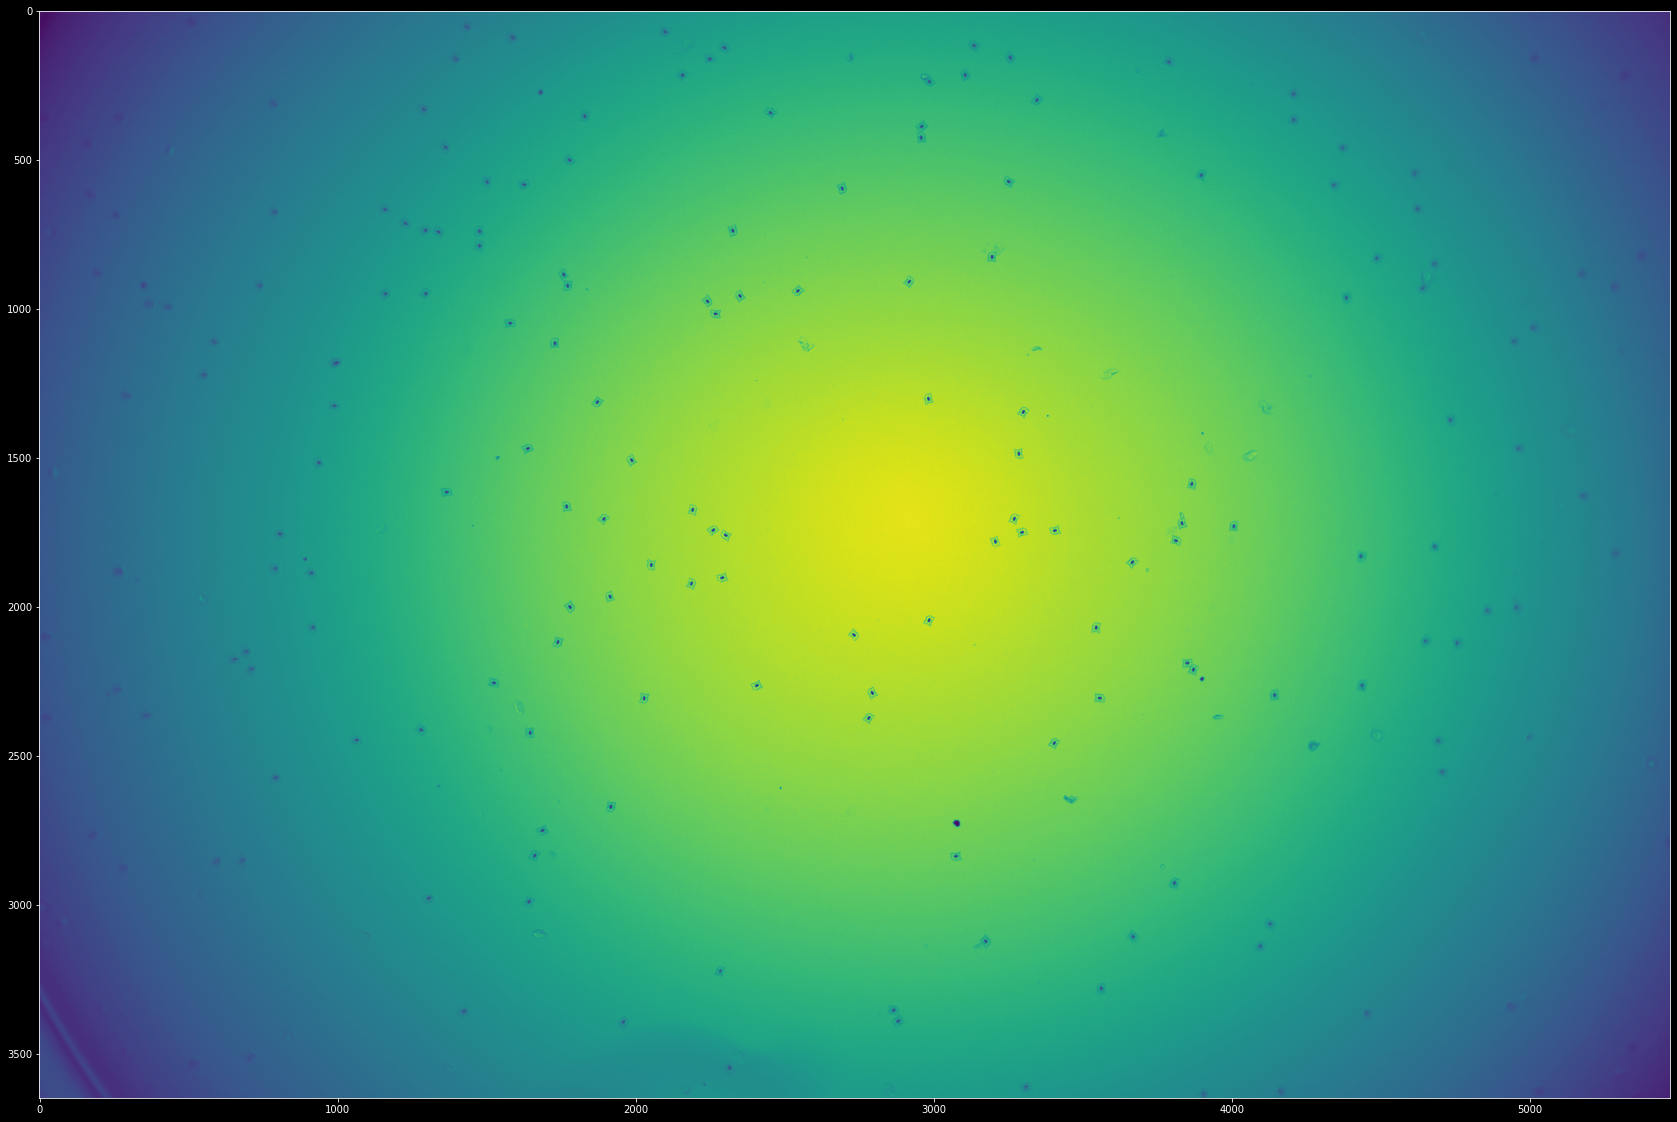

In [38]:
plt.figure(figsize=(30, 20))
plt.imshow(img_1)

In [39]:
img_2 = functions.adaptiveThreshold(img_1, kernalSize = 111, offset=-3)

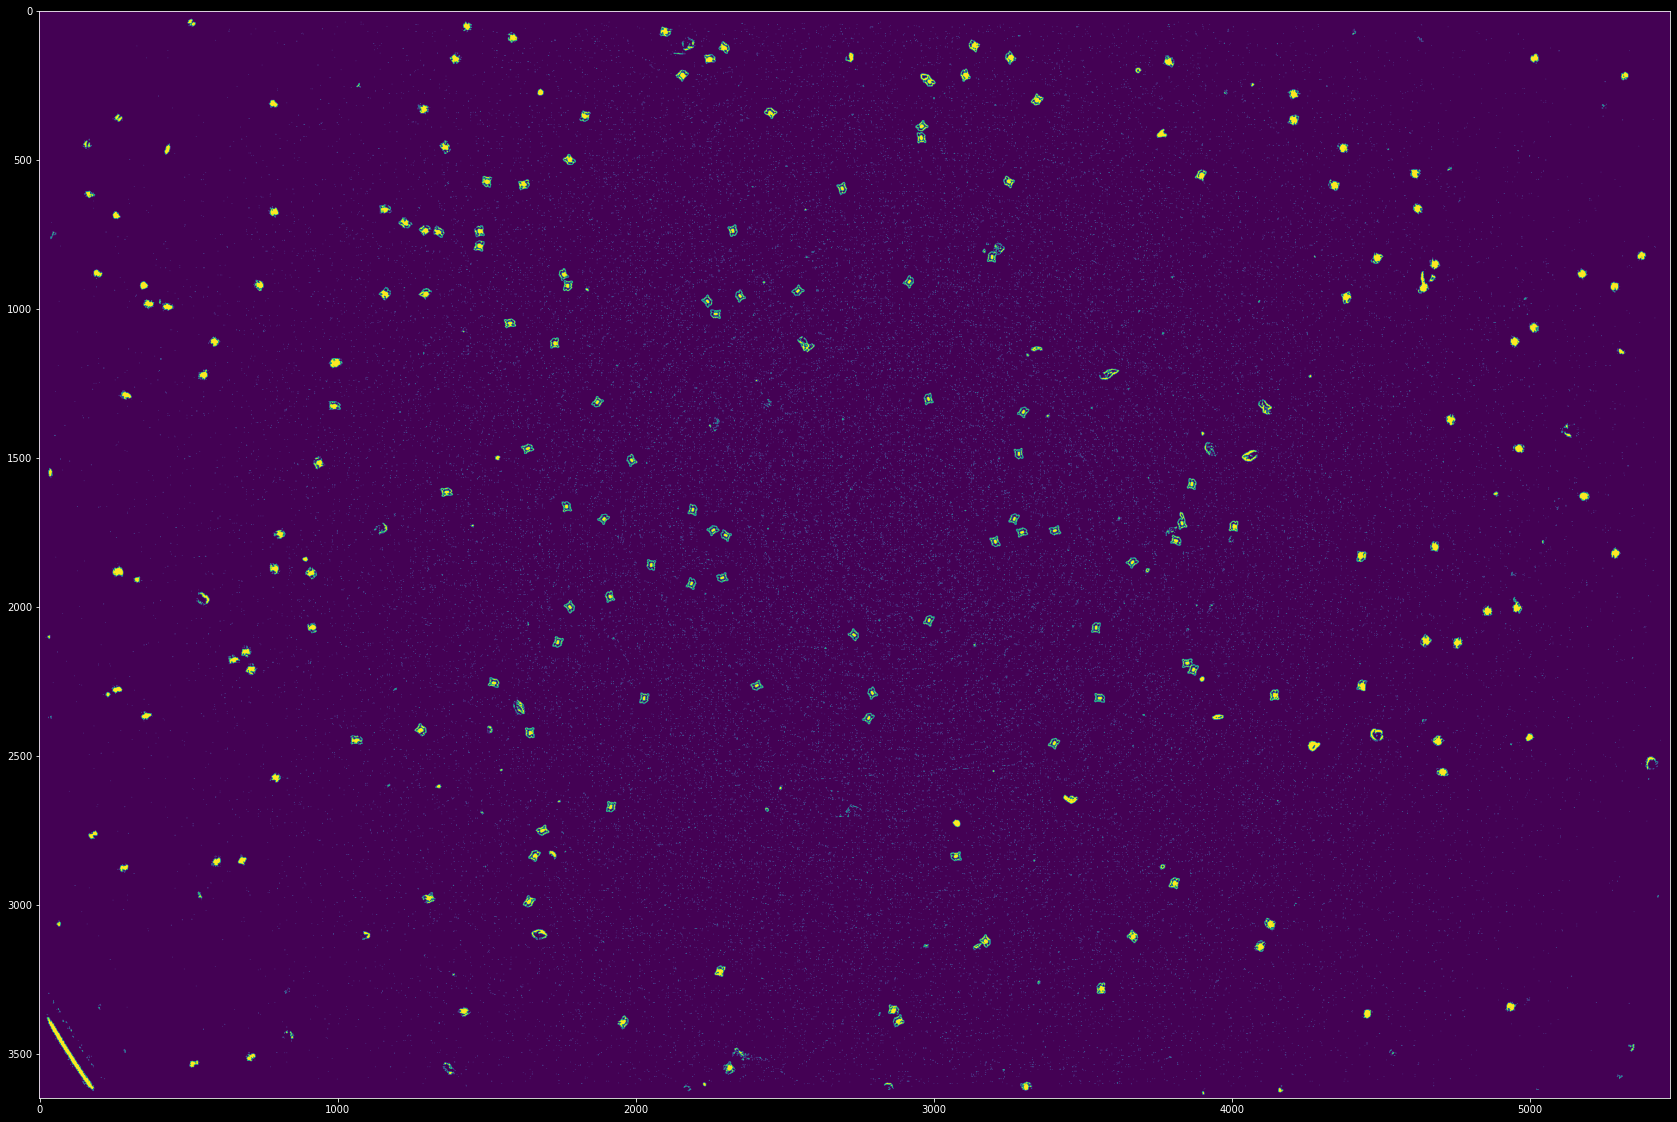

In [40]:
plt.figure(figsize=(30, 20))
plt.imshow(img_2)

In [41]:
img_3 = cv2.erode(img_2, np.ones([7, 7]))

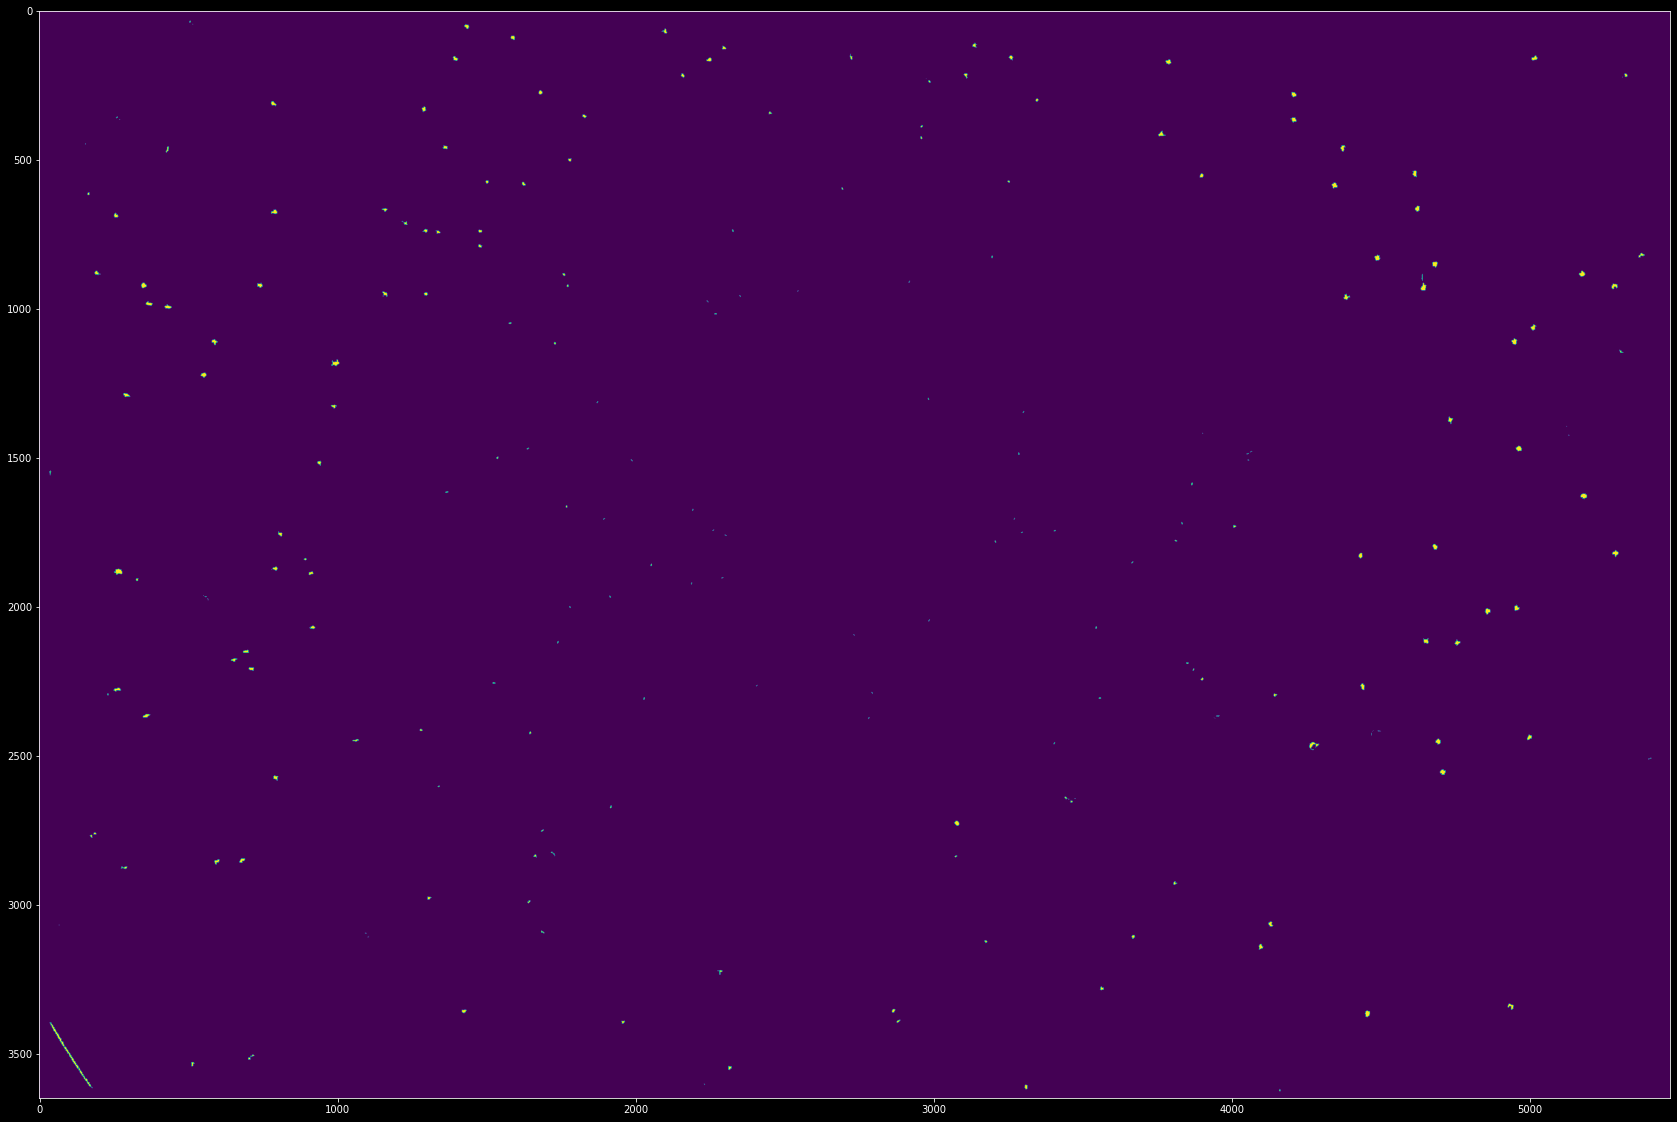

In [42]:
plt.figure(figsize=(30, 20))
plt.imshow(img_3)

In [43]:
img_4 = cv2.dilate(img_3, np.ones([7, 7]), iterations=3)

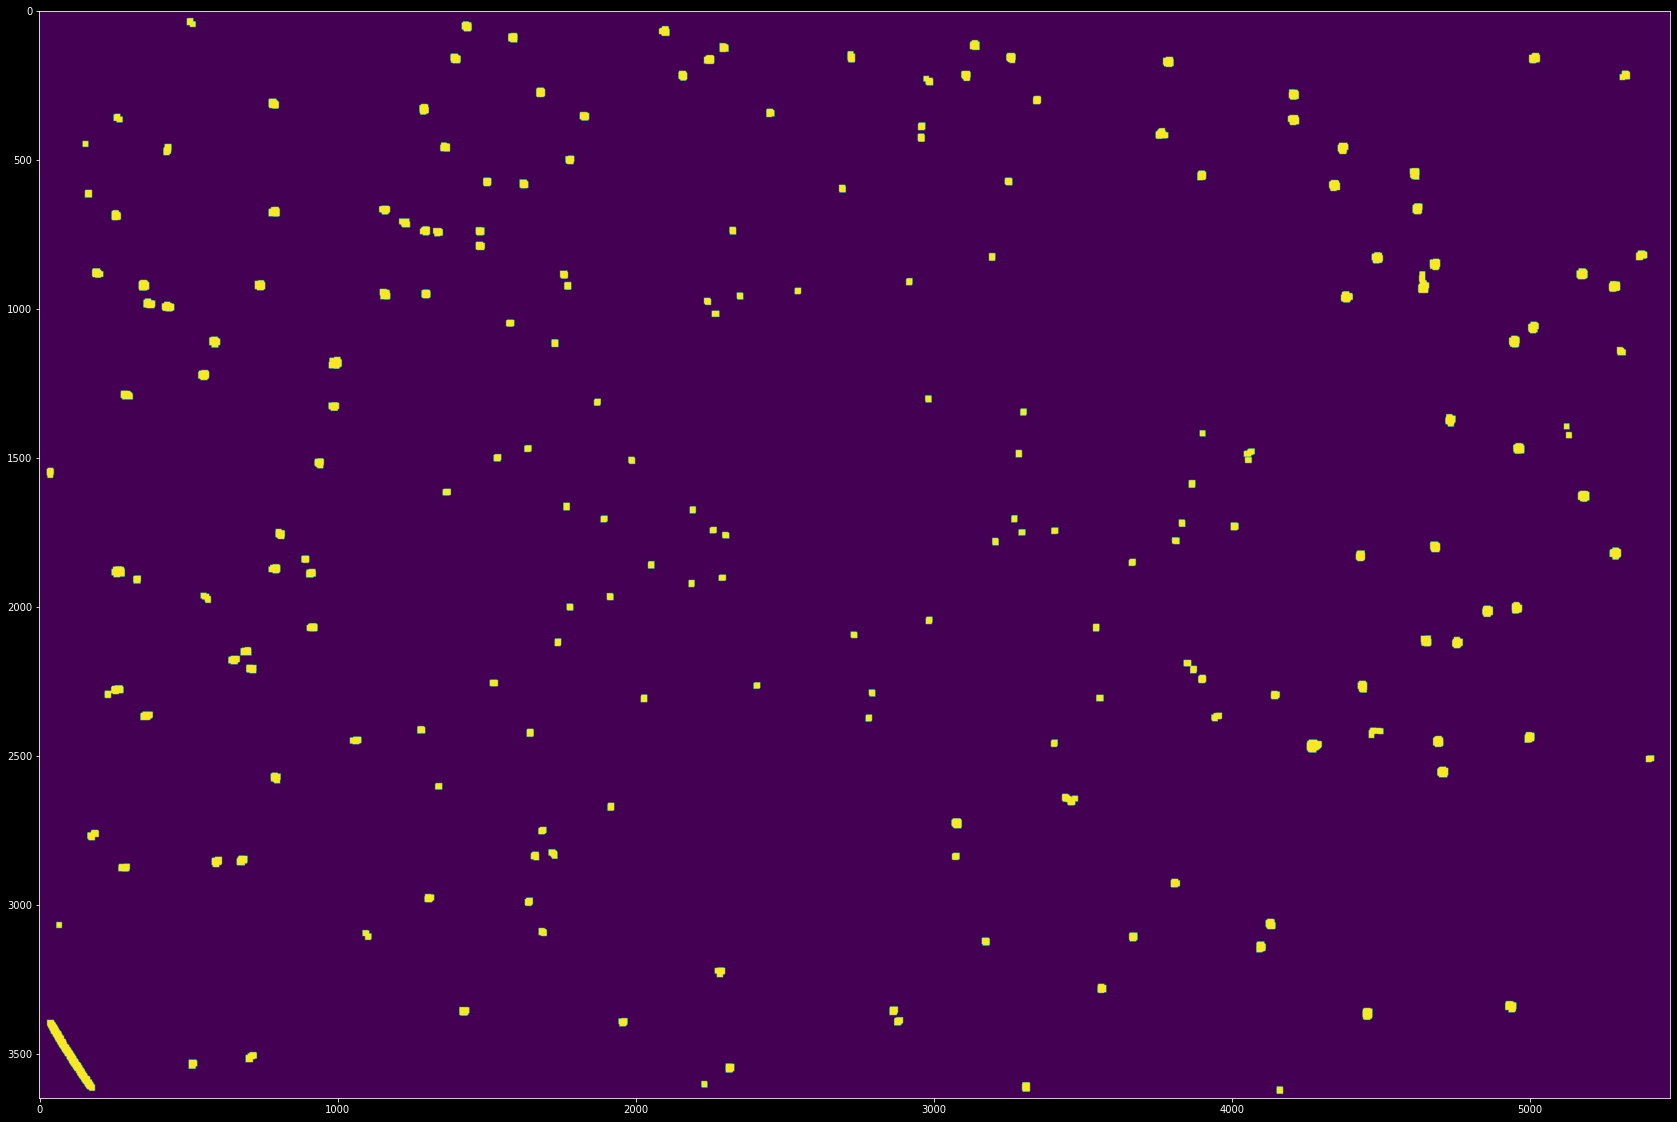

In [44]:
plt.figure(figsize=(30, 20))
plt.imshow(img_4)

In [45]:
labels = functions.connectedComponents(img_4)

uni, cnt = np.unique(labels, return_counts=True)

In [46]:
img_5 = np.zeros(img_4.shape, dtype=np.uint8)
img_5[labels > 0] = 1
img_5[labels == uni[np.argmax(cnt[1:]) + 1]] = 0

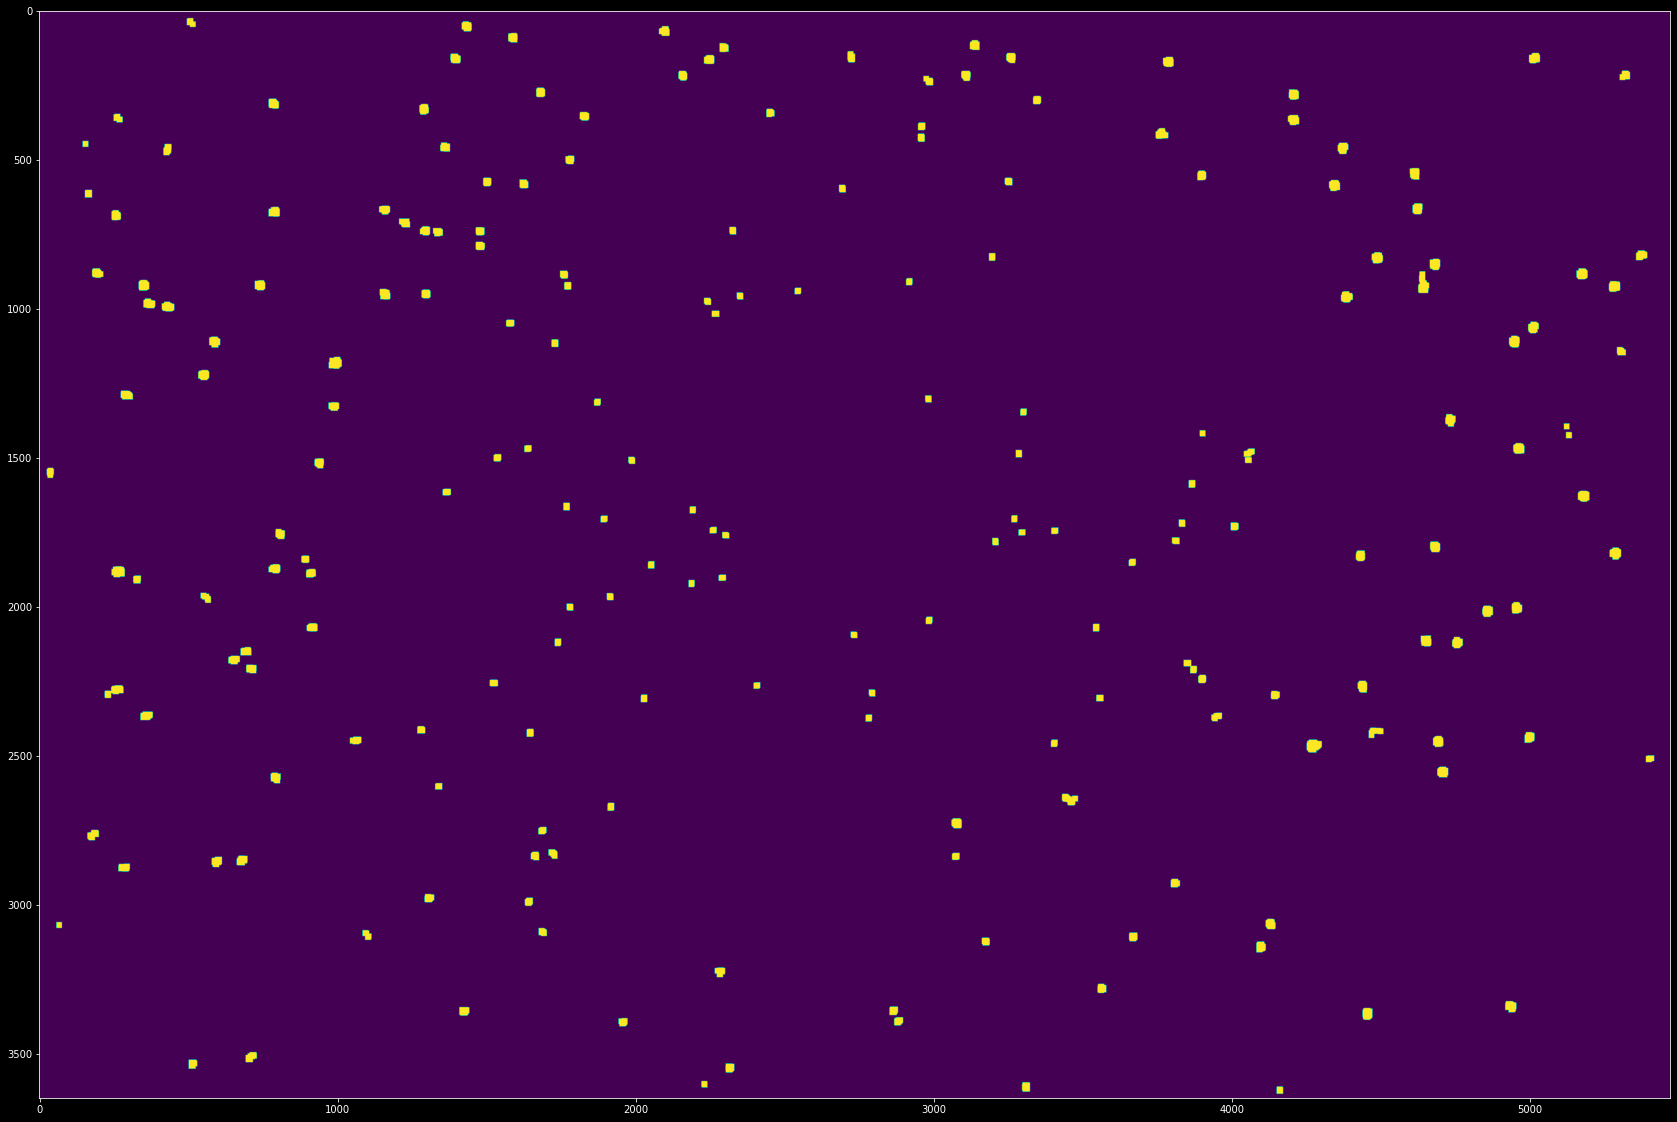

In [47]:
plt.figure(figsize=(30, 20))
plt.imshow(img_5)

In [48]:
img_6 = cv2.cvtColor(np.logical_not(img_5).astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)
cv2.imwrite(f'./resultImages/{fileName}', img_6)

True